In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Nadam

from datetime import datetime

In [149]:
def plotf(f_data, f_y_feature, f_x_feature, f_index=-1):

    for f_row in f_data:
        if f_index >= 0:
            f_color = np.where(f_data[f_row].index == f_index,'red','silver')
            f_hue = None
        else:
            f_color = np.where(f_data[f_row].index == f_index,'green','darkseagreen')
            f_hue = None
    
    f_fig, f_a = plt.subplots(1, 2, figsize=(16,4))
    
    f_chart1 = sns.histplot(f_data[f_x_feature], ax=f_a[0], kde=False, color='silver')
    f_chart1.set_xlabel(f_x_feature,fontsize=10)
    
    if f_index >= 0:
        f_chart2 = plt.scatter(f_data[f_x_feature], f_data[f_y_feature], c=f_color, edgecolors='w')
        f_chart2 = plt.xlabel(f_x_feature, fontsize=10)
        f_chart2 = plt.ylabel(f_y_feature, fontsize=10)
    else:
        f_chart2 = sns.scatterplot(x=f_x_feature, y=f_y_feature, data=f_data,c=f_color, hue=f_hue, legend=False)
        f_chart2.set_xlabel(f_x_feature,fontsize=10)
        f_chart2.set_ylabel(f_y_feature,fontsize=10)

    plt.show() 

In [ ]:
def correlation(f_data, f_feature, f_number):

    f_most_correlated = f_data.corr().nlargest(f_number,f_feature)[f_feature].index
    f_correlation = f_data[f_most_correlated].corr()
    
    f_mask = np.zeros_like(f_correlation)
    f_mask[np.triu_indices_from(f_mask)] = True
    with sns.axes_style("white"):
        f_fig, f_ax = plt.subplots(figsize=(20, 10))
        sns.heatmap(f_correlation, mask=f_mask, vmin=-1, vmax=1, square=True,
                    center=0, annot=True, annot_kws={"size": 8}, cmap="Greens")
    plt.show()

In [141]:
sns.set()
start_time = datetime.now()

data = pd.read_csv('data/SmartGridStabilityAugmented.csv')

map1 = {'unstable': 0, 'stable': 1}
data['stabf'] = data['stabf'].replace(map1)

data = data.sample(frac=1)

In [46]:
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
5405,8.653990,8.822672,5.712723,3.200214,2.755912,-0.748594,-1.197279,-0.810039,0.181581,0.853083,0.488342,0.260537,0.033758,0
5770,3.477350,3.879044,1.007496,3.808175,3.130588,-1.510603,-0.867974,-0.752011,0.819672,0.067471,0.352081,0.704776,-0.004538,1
49305,9.655557,1.389455,3.796594,5.796658,3.965245,-1.648607,-1.349662,-0.966976,0.084788,0.172237,0.771120,0.595080,-0.006867,1
56800,6.349374,3.645365,2.394443,3.373972,5.004762,-1.317382,-1.735476,-1.951904,0.818224,0.772124,0.361062,0.462628,0.042866,0
33955,9.295890,2.457239,4.730816,2.439165,3.888004,-1.203800,-1.446436,-1.237768,0.301822,0.259819,0.806994,0.160942,-0.012436,1


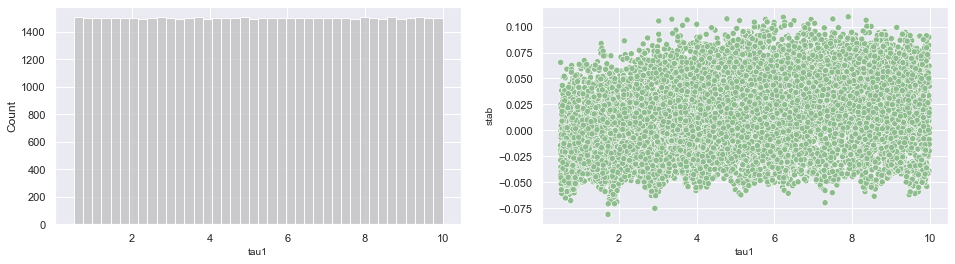

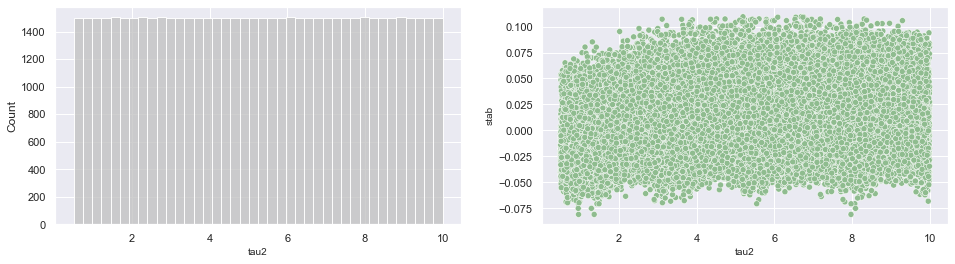

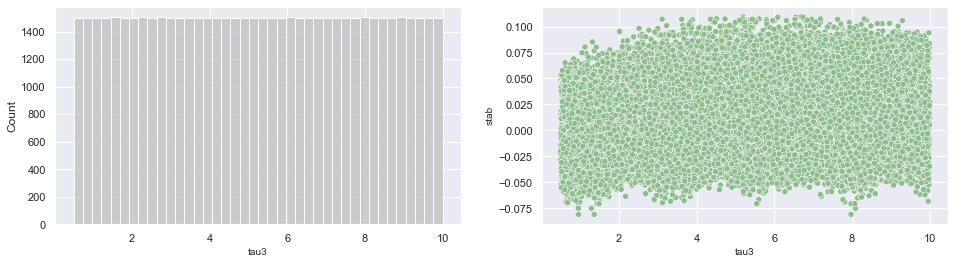

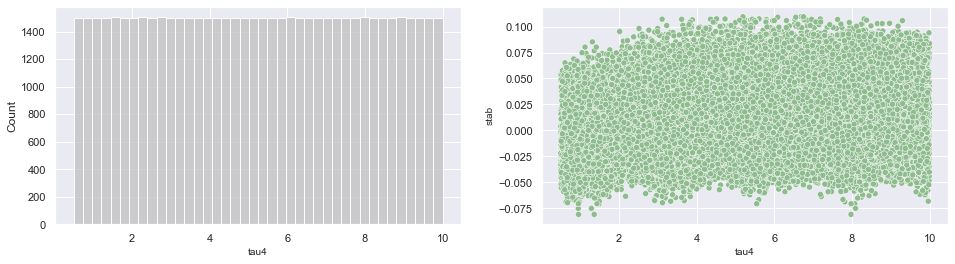

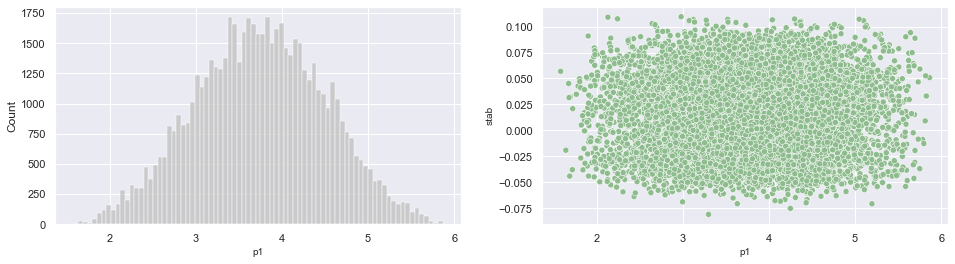

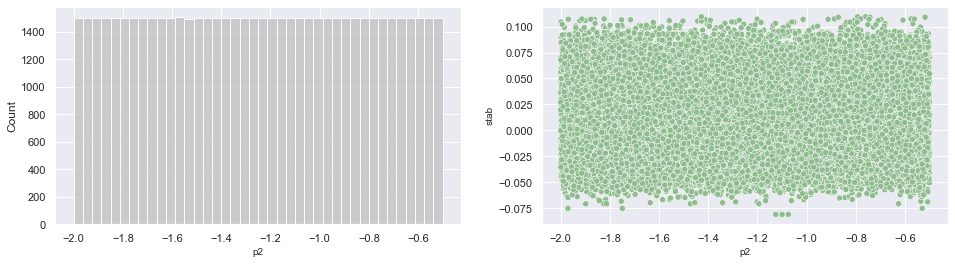

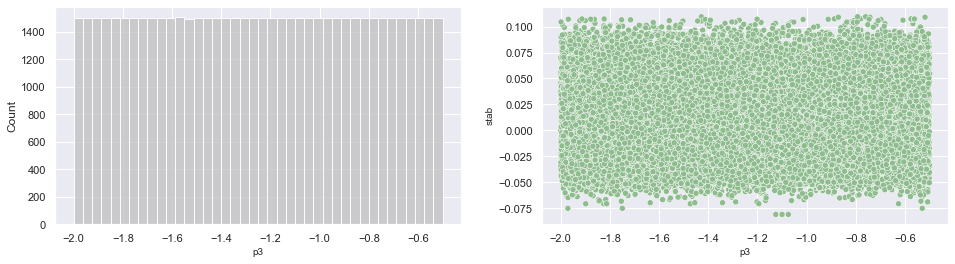

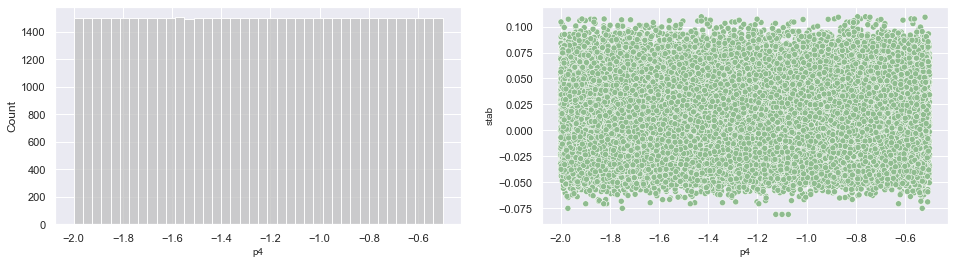

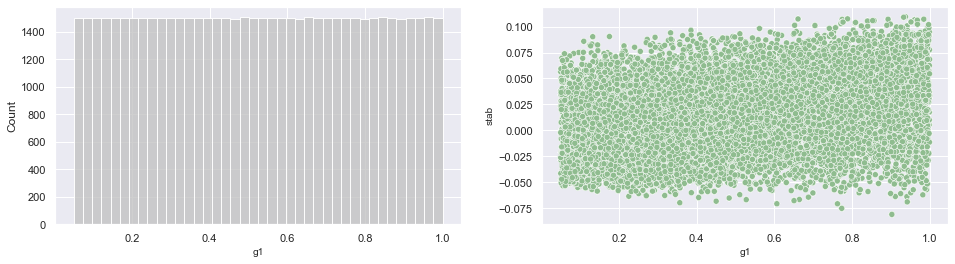

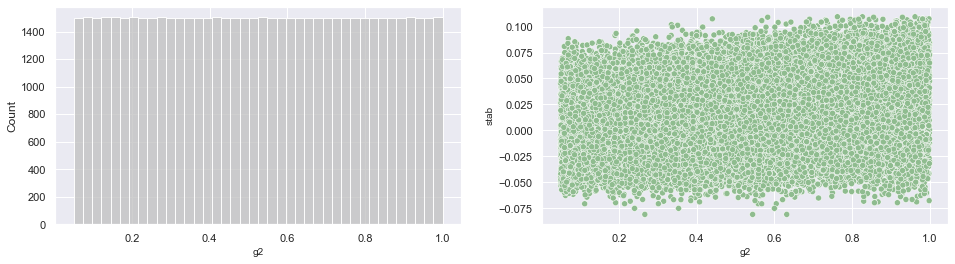

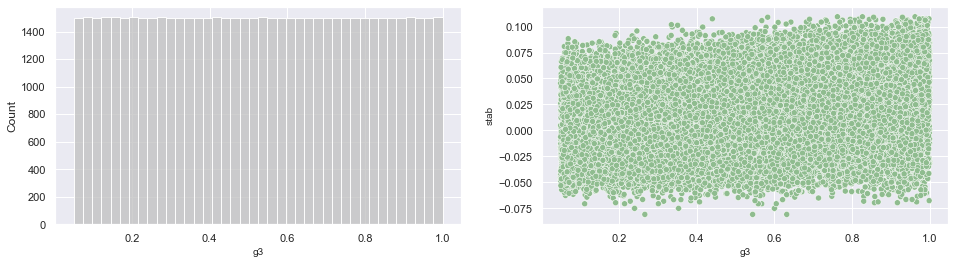

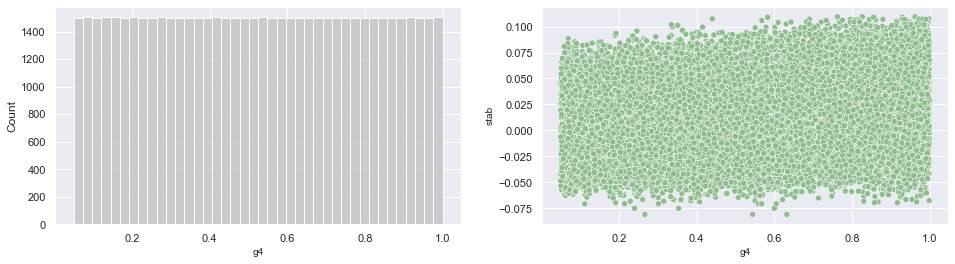

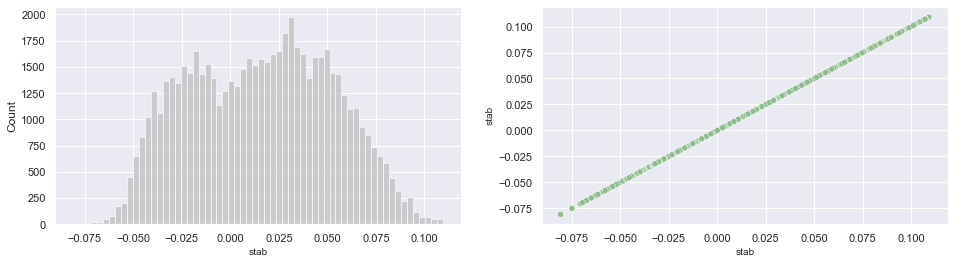

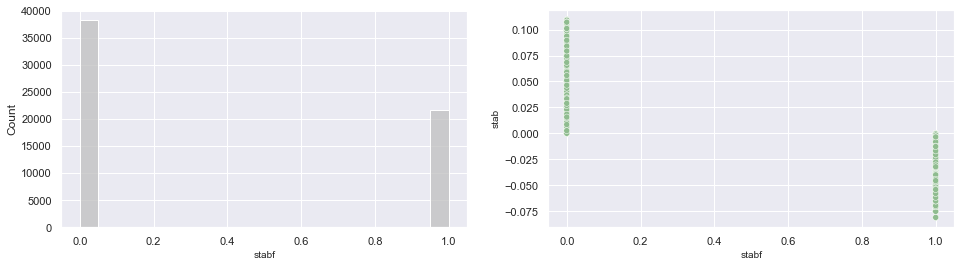

In [147]:
for column in data.columns:
    plotf(data, 'stab', column, -1)

In [48]:
data.p1.skew()

-0.012688423269883422

In [49]:
print(f'In the original dataset, the split of "unstable" (0) and "stable" (1) observations:')
print(data['stabf'].value_counts(normalize=True))

In the original dataset, the split of "unstable" (0) and "stable" (1) observations:
0    0.638
1    0.362
Name: stabf, dtype: float64


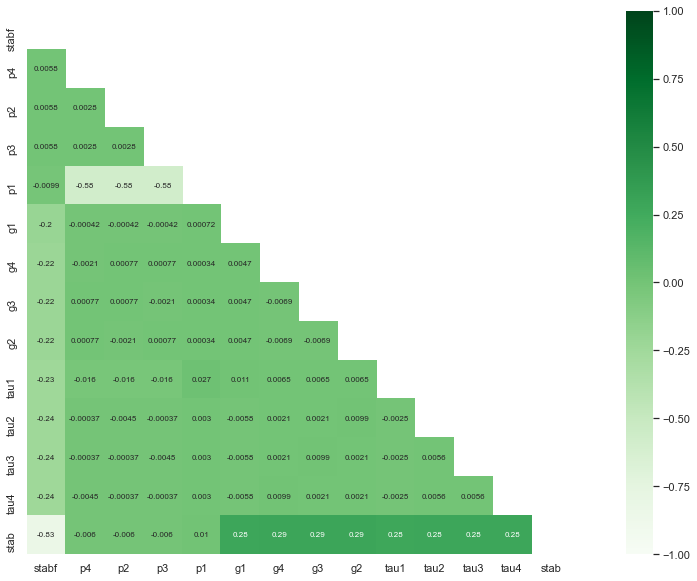

In [148]:
correlation(data, 'stabf', 14)

In [65]:
X = data.iloc[:, :12]
y = data.iloc[:, 13]

X_train1 = X.iloc[:54000, :]
y_train1 = y.iloc[:54000]

X_test1 = X.iloc[54000:, :]
y_test1 = y.iloc[54000:]

ratio_training = y_training.value_counts(normalize=True)
ratio_testing = y_testing.value_counts(normalize=True)
ratio_training, ratio_testing

(0    0.638074
 1    0.361926
 Name: stabf, dtype: float64,
 0    0.637333
 1    0.362667
 Name: stabf, dtype: float64)

In [66]:
X_train1 = X_train1.values
y_train1 = y_train1.values

X_test1 = X_test1.values
y_test1 = y_test1.values

In [67]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
# ANN initialization
classifier = Sequential()

# Input layer and first hidden layer
classifier.add(Dense(units = 288 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))

#Second hidden layer
classifier.add(Dense(units = 288, kernel_initializer = 'uniform', activation = 'relu'))

# Third hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu'))

# Fourth hidden layer
classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))

# Single-node output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# ANN compilation
classifier.compile(optimizer = "nadam", loss = 'binary_crossentropy', metrics = ['accuracy'])


In [69]:
cross_val_round = 1

for train_index, val_index in KFold(10, shuffle=True, random_state=10).split(X_training):
    x_train, x_val = X_train1[train_index], X_train1[val_index]
    y_train ,y_val = y_train1[train_index], y_train1[val_index]
    classifier.fit(x_train, y_train, epochs=50)
    print(f'\nModel evaluation - Round {cross_val_round}: {classifier.evaluate(x_val, y_val)}\n')
    cross_val_round += 1

Epoch 1/50
1519/1519 [==============================] - 11s 6ms/step - loss: 0.2890 - accuracy: 0.8668 2s - loss: 0.3160 
Epoch 2/50
1519/1519 [==============================] - 7s 5ms/step - loss: 0.1548 - accuracy: 0.9344
Epoch 3/50
1519/1519 [==============================] - 7s 5ms/step - loss: 0.1224 - accuracy: 0.9478
Epoch 4/50
1519/1519 [==============================] - 7s 5ms/step - loss: 0.1064 - accuracy: 0.9558
Epoch 5/50
1519/1519 [==============================] - 8s 5ms/step - loss: 0.0986 - accuracy: 0.9596
Epoch 6/50
1519/1519 [==============================] - 11s 7ms/step - loss: 0.0920 - accuracy: 0.9619
Epoch 7/50
1519/1519 [==============================] - 8s 5ms/step - loss: 0.0875 - accuracy: 0.9629
Epoch 8/50
1519/1519 [==============================] - 8s 5ms/step - loss: 0.0832 - accuracy: 0.9648
Epoch 9/50
1519/1519 [==============================] - 12s 8ms/step - loss: 0.0792 - accuracy: 0.9659
Epoch 10/50
1519/1519 [==============================] - 7s 

In [73]:
print(X_test1.shape)
#X_testing=X_test1.reshape(6000,12,1)
y_pred = classifier.predict(X_test1)
#y_pred = y_pred.reshape(6000,1)

(6000, 12)


In [75]:
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1
print(y_pred)

[[0.]
 [0.]
 [1.]
 ...
 [1.]
 [1.]
 [0.]]


In [76]:
ConfusionMatrix = confusion_matrix(y_test1, y_pred)
print(ConfusionMatrix)


[[3817    7]
 [  30 2146]]


In [79]:
print(f'Accuracy: {(ConfusionMatrix[0][0] + ConfusionMatrix[1][1]) / ConfusionMatrix.sum()*100:.2f}%')

Accuracy: 99.38%
